<a href="https://colab.research.google.com/github/PranavNG/Machine-Learning/blob/main/Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [ ]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [ ]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)

X_train[0].min(), X_train[0].max()


(0.0, 1.0)

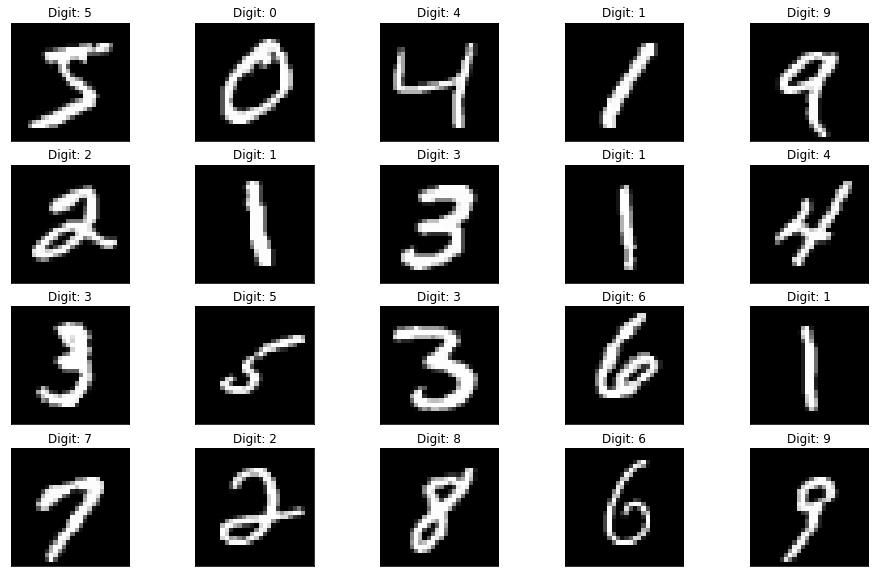

In [ ]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

In [ ]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2351 - accuracy: 0.9291
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0743 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0488 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0345 - accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0202 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0151 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0078 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 34s 18m

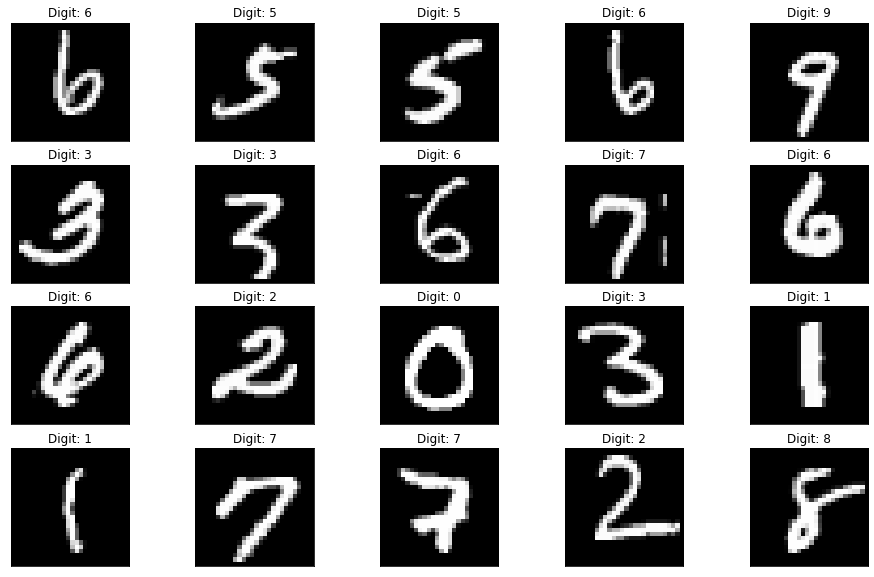

In [ ]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()